
Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "This graph (network) is connected."


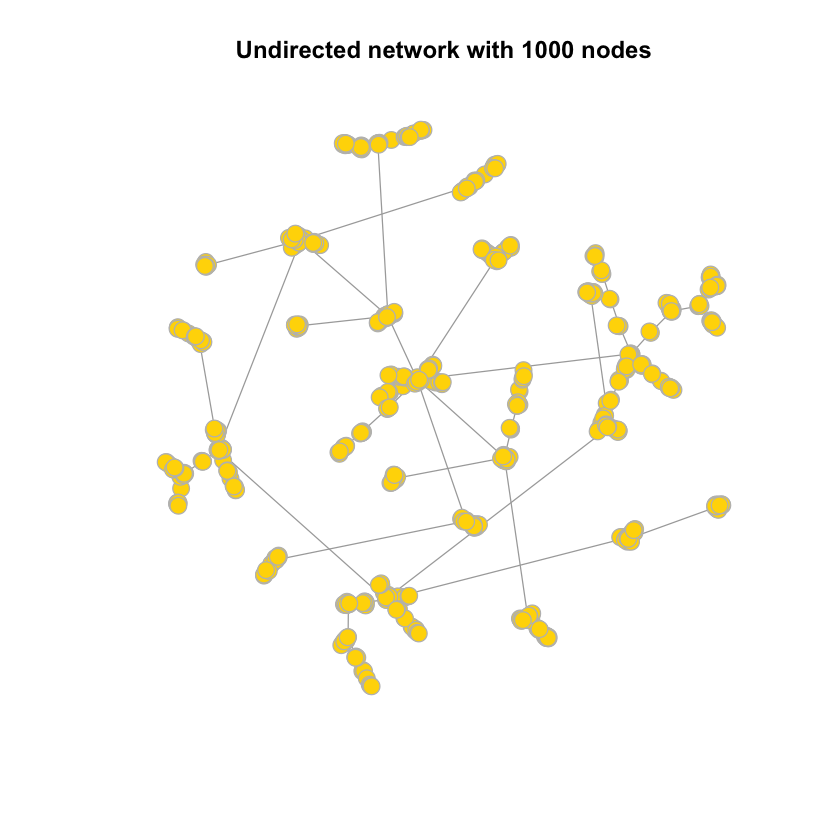

In [2]:
library(igraph)
library(ggplot2)
# a
# create an undirected network with 1000 nodes, where each new node attaches to 1 old nodes
g <- barabasi.game(1000, m = 1, directed = F)
if (is.connected(g)) {
  print("This graph (network) is connected.")
}
plot(main = "Undirected network with 1000 nodes", g, edge.arrow.size = .5, vertex.color = "gold", vertex.size = 6, vertex.frame.color = "gray", vertex.label = "") 

[1] 0.9339966

IGRAPH clustering fast greedy, groups: 31, mod: 0.93
+ groups:
  $`1`
   [1]   7  27  59  69 106 143 180 188 209 226 288 290 297 342 395 408 411 473
  [19] 474 476 497 500 533 548 553 576 613 621 645 719 728 735 747 752 765 775
  [37] 783 815 837 844 848 869 873 877 880 896 982 986 987
  
  $`2`
   [1]  10  37  38 104 113 126 139 183 185 236 249 258 296 319 326 355 358 360
  [19] 364 368 421 446 451 455 462 528 571 582 593 608 634 720 733 744 772 782
  [37] 809 840 843 850 853 909 916 958 964 966 998
  
  + ... omitted several groups/vertices


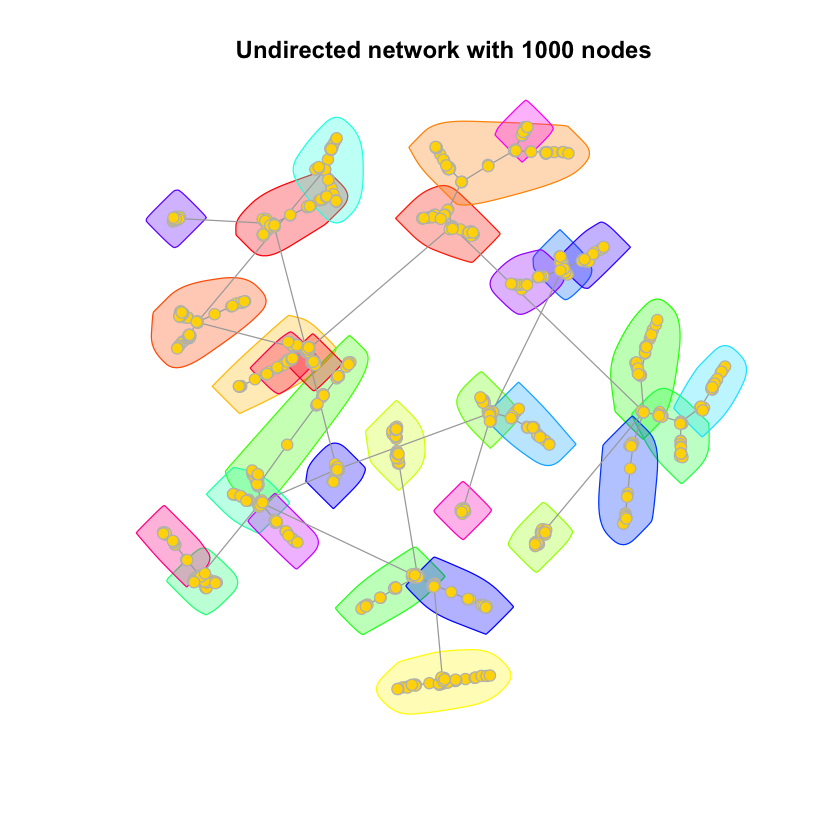

In [59]:
# b
# Result of network community detection 
# modularity measurement
# plot community structure
community <- cluster_fast_greedy(g)
modularity(community)
print(community)
plot(main = "Undirected network with 1000 nodes", g, vertex.color = "gold", mark.groups = groups(community), vertex.size = 4, 
     vertex.frame.color = "gray", vertex.label.cex = 0.8, vertex.label = "")

[1] 0.978284

IGRAPH clustering fast greedy, groups: 108, mod: 0.98
+ groups:
  $`1`
    [1]   62  130  152  165  227  238  262  268  410  586  630  700  905 1002
   [15] 1004 1014 1044 1050 1065 1076 1153 1196 1309 1311 1336 1587 1595 1620
   [29] 1652 1666 1761 1770 1947 2098 2131 2148 2175 2412 2537 2604 2642 2694
   [43] 2737 2739 2751 2819 2844 2858 2863 2947 2998 3090 3120 3123 3127 3137
   [57] 3194 3261 3267 3268 3312 3358 3463 3469 3475 3478 3501 3590 3591 3639
   [71] 3657 3664 3693 3731 3824 3833 3848 3886 3904 3927 4098 4163 4228 4350
   [85] 4356 4388 4449 4454 4483 4582 4717 4995 5058 5067 5172 5181 5227 5260
   [99] 5349 5370 5383 5419 5471 5493 5508 5557 5630 5676 5754 5852 6175 6214
  [113] 6280 6314 6356 6410 6528 6557 6575 6583 6591 6707 6752 6889 6902 6921
  + ... omitted several groups/vertices


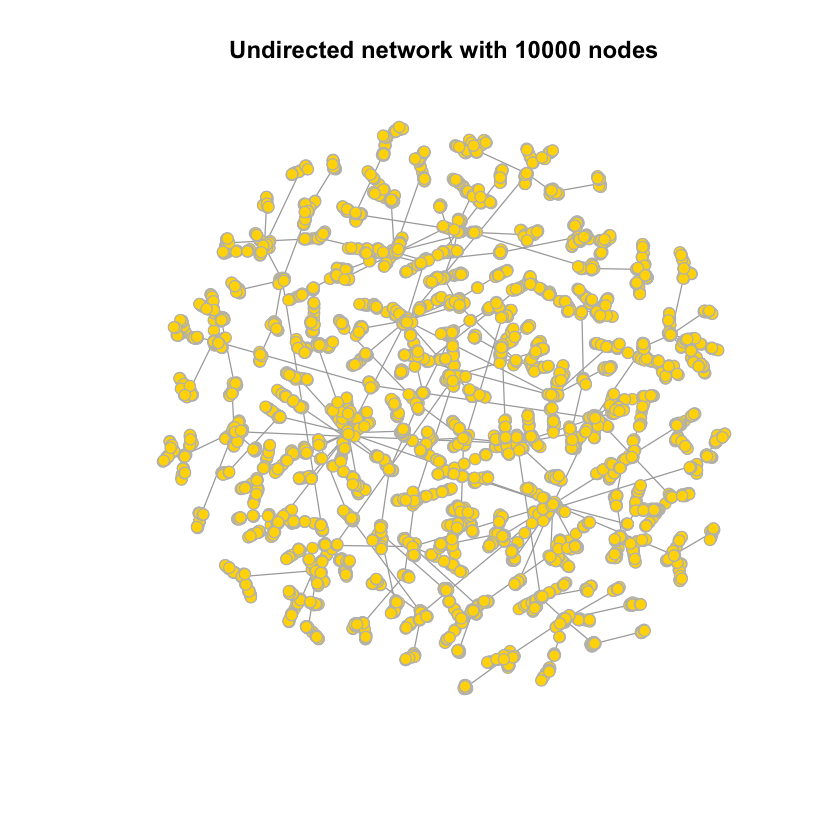

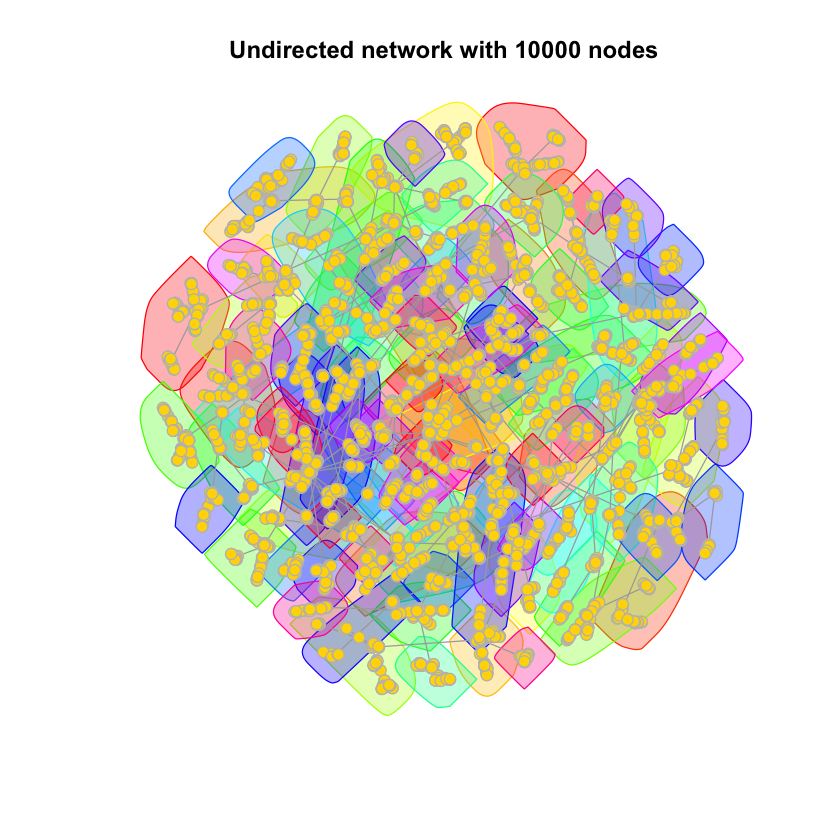

In [3]:
# c
g_c <- barabasi.game(10000, m = 1, directed = F)
plot(main = "Undirected network with 10000 nodes", g_c, vertex.color = "gold", vertex.size = 4, vertex.frame.color = "gray", vertex.label = "") 

community_c <- cluster_fast_greedy(g_c)
modularity(community_c)
print(community_c)
plot(main = "Undirected network with 10000 nodes", g_c, vertex.color = "gold", mark.groups = groups(community_c), vertex.size = 4, 
     vertex.frame.color = "gray", vertex.label.cex = 0.8, vertex.label = "")

[1] "Slope of the plot is  -2.75444936811754"


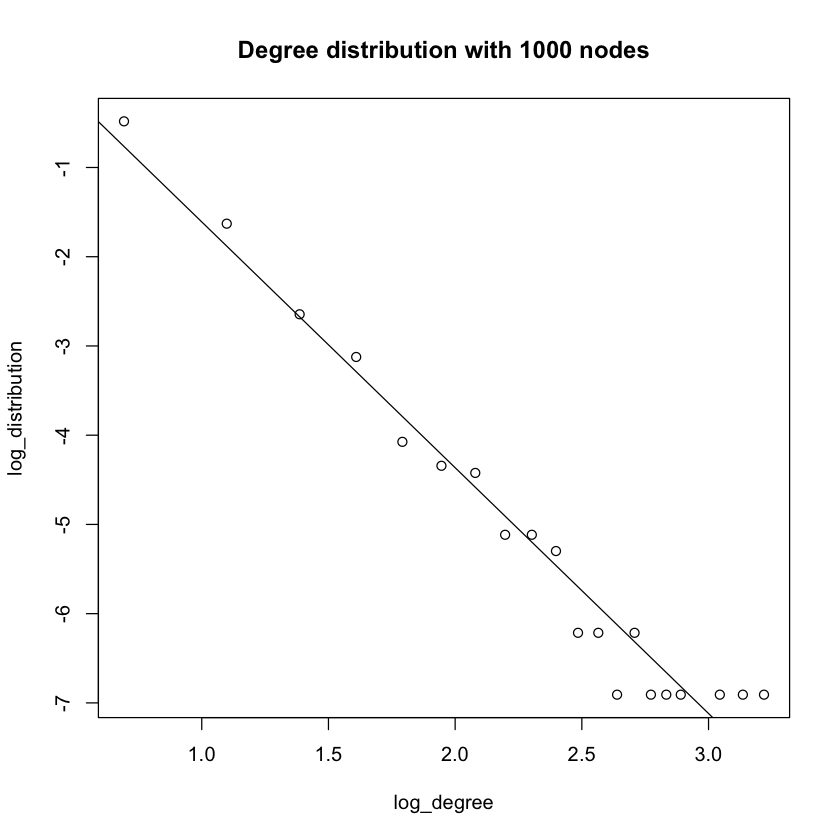

[1] "Slope of the plot is  -2.93575439312794"


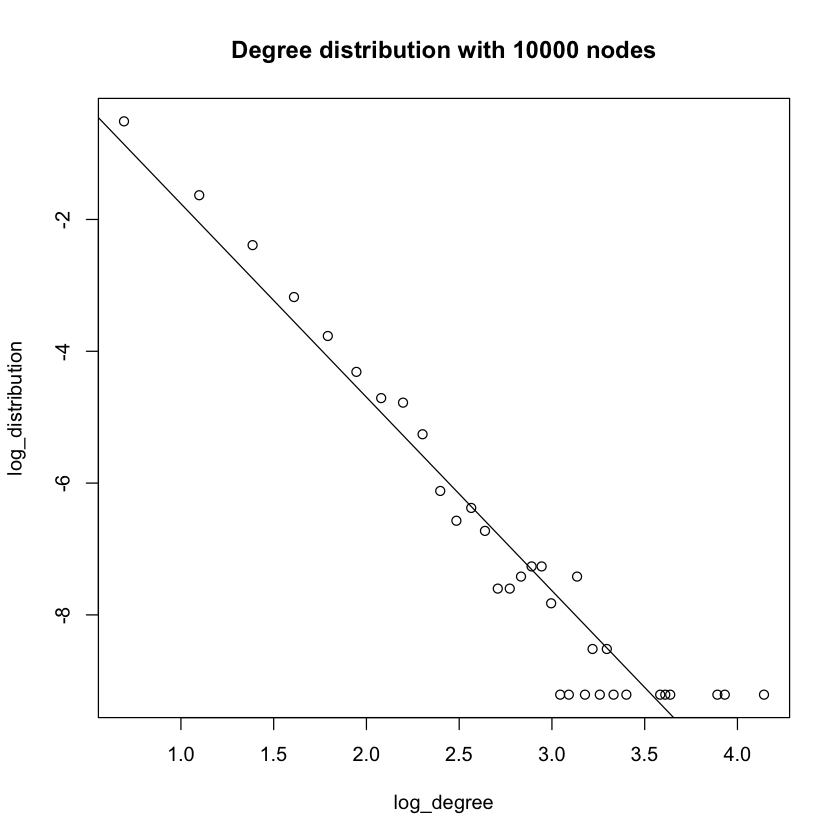

In [7]:
# d
degree_distribution = function(graph, n) {
    log_degree = log(seq(1:length(degree.distribution(graph))))
    log_distribution = log(degree.distribution(graph))
        
    index = which(!is.infinite(log_distribution), arr.ind=TRUE)
    log_degree = log_degree[index]
    log_distribution = log_distribution[index] # Exclude points whose value of log_distribution is -inf
    
    plot(main = paste("Degree distribution with", n, "nodes"), log_degree, log_distribution, 
         abline(lm(log_distribution ~ log_degree))) # Plot degree distribution and linear regression, find slope 
    print(paste("Slope of the plot is ", cov(log_degree, log_distribution) / var(log_degree)))
}

degree_distribution(g, 1000)
degree_distribution(g_c, 10000)

[1] "Slope of the plot is  -1.20119990330144"
[1] "Slope of the plot is  -1.74707715327595"


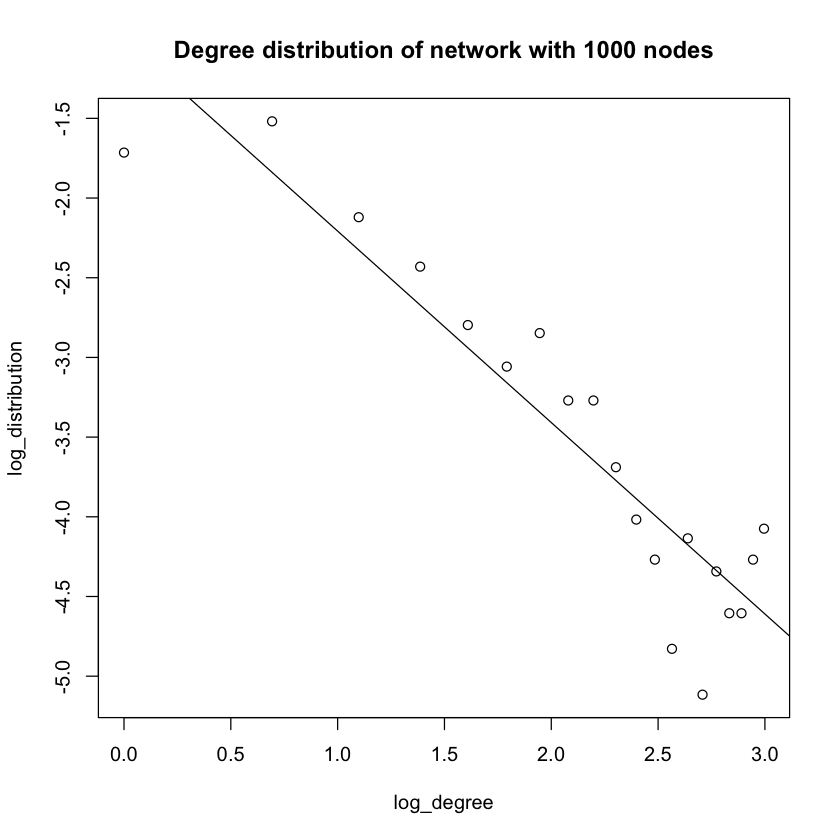

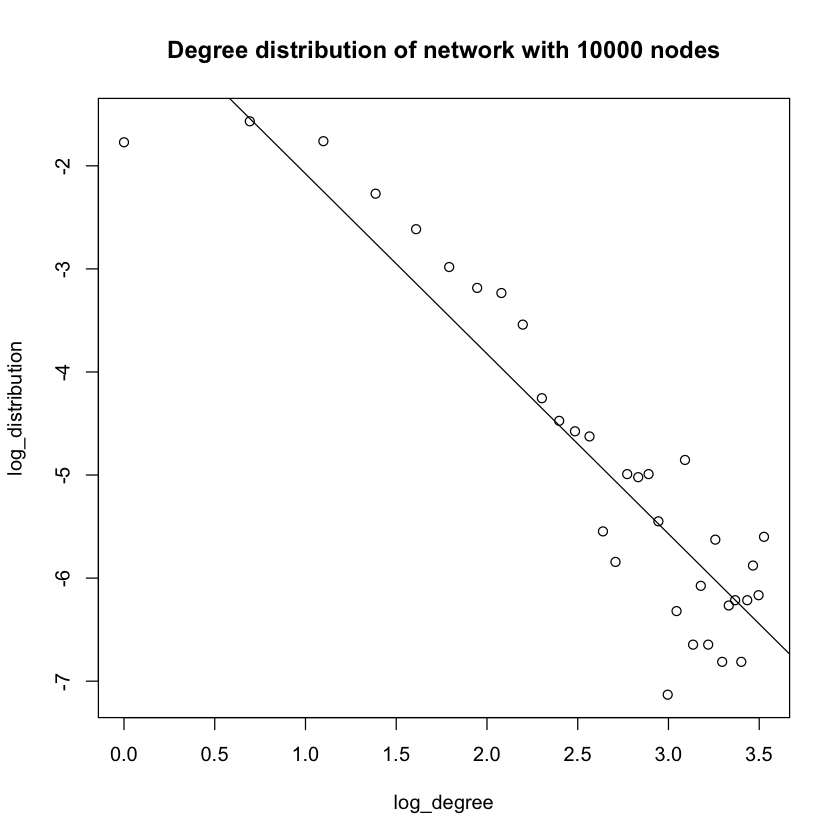

In [5]:
# e
node_neighbor_degree_distribution = function(graph, n) {
    degree_neighbors = c()
    for (i in 1:n) {
        node = sample(n, 1) # Random pick a node
        neighbor_node = neighbors(graph, node) # Random pick a neighbor of that node
        if (length(neighbor_node) == 1) {
            neighbor = neighbor_node
        } else {
            neighbor = sample(neighbor_node, 1)
        }
        degree_neighbors = c(degree_neighbors, degree(graph, neighbor))
    }    
    df <- as.data.frame(table(degree_neighbors))
    
    log_degree <- log(as.numeric(df[, "degree_neighbors"]))
    log_distribution <- log(as.numeric(df[, "Freq"] / n))
  
    print(paste("Slope of the plot is ", cov(log_degree, log_distribution) / var(log_degree)))
    plot(main = paste("Degree distribution of network with", n, "nodes"), 
         log_degree, log_distribution, abline(lm(log_distribution ~ log_degree)))
}
node_neighbor_degree_distribution(g, 1000)
node_neighbor_degree_distribution(g_c, 10000)

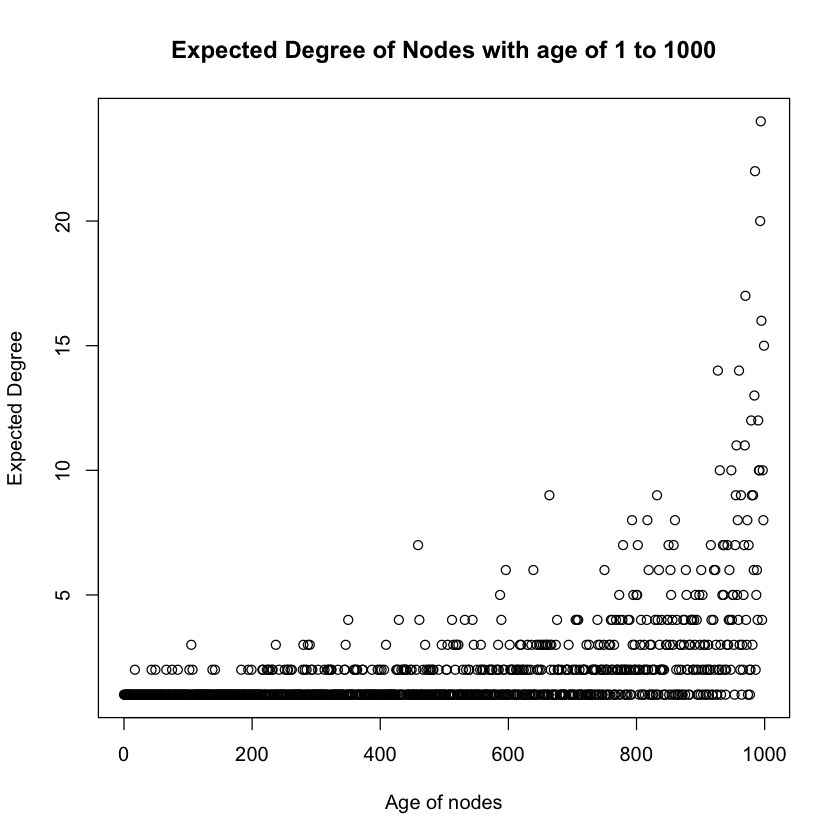

In [10]:
# f
exp_degree = array(0, 1000)
# Expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000
for (i in 1:1000) {
    exp_degree <- exp_degree + degree(g)
}
exp_degree <- exp_degree / 1000
age <- c(999:0)
plot(data.frame(age, exp_degree), main = "Expected Degree of Nodes with age of 1 to 1000", 
     xlab = "Age of nodes",ylab = "Expected Degree")

IGRAPH clustering fast greedy, groups: 17, mod: 0.52
+ groups:
  $`1`
   [1]  76 115 140 141 146 166 171 172 193 231 241 256 281 331 337 338 353 355
  [19] 356 390 398 456 479 489 510 515 531 532 665 692 696 720 760 770 778 783
  [37] 790 816 853 862 918
  
  $`2`
   [1]  48 189 217 252 253 260 266 270 288 297 325 329 344 424 440 451 453 473
  [19] 475 487 507 524 552 584 604 606 647 666 698 737 812 886 887 901 902 930
  [37] 941 949 951 975 989 992
  
  + ... omitted several groups/vertices


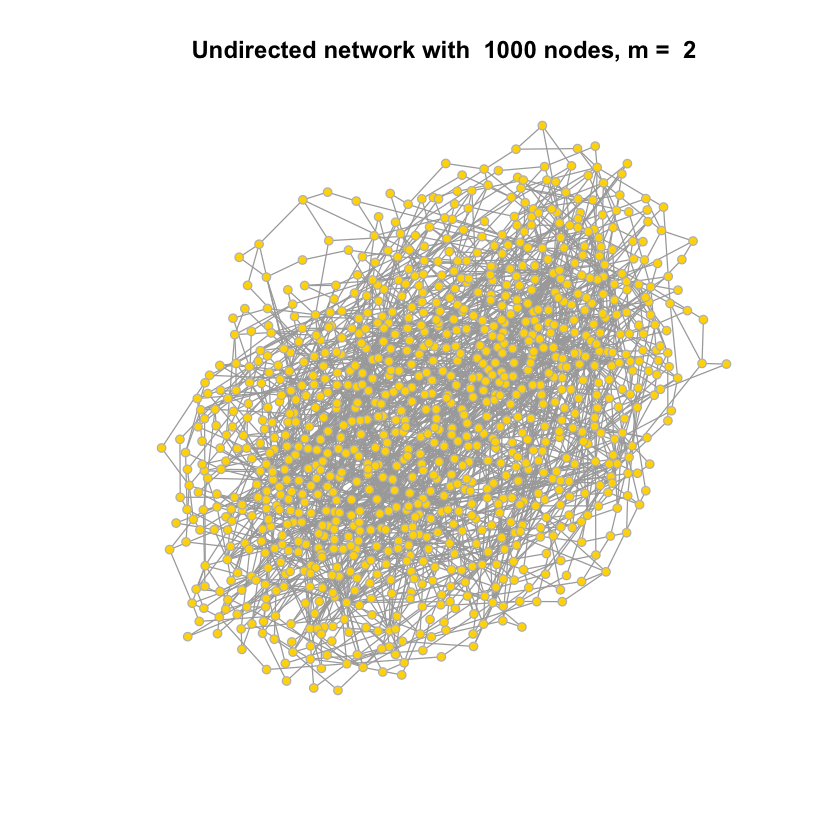

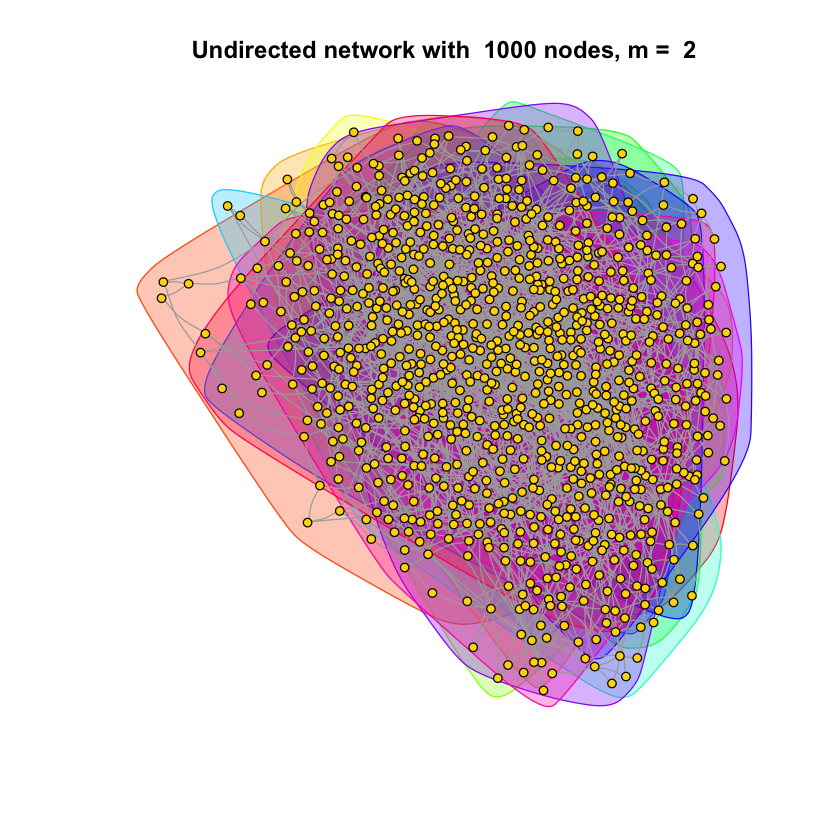

[1] "Slope of the plot is  -2.27221230019718"


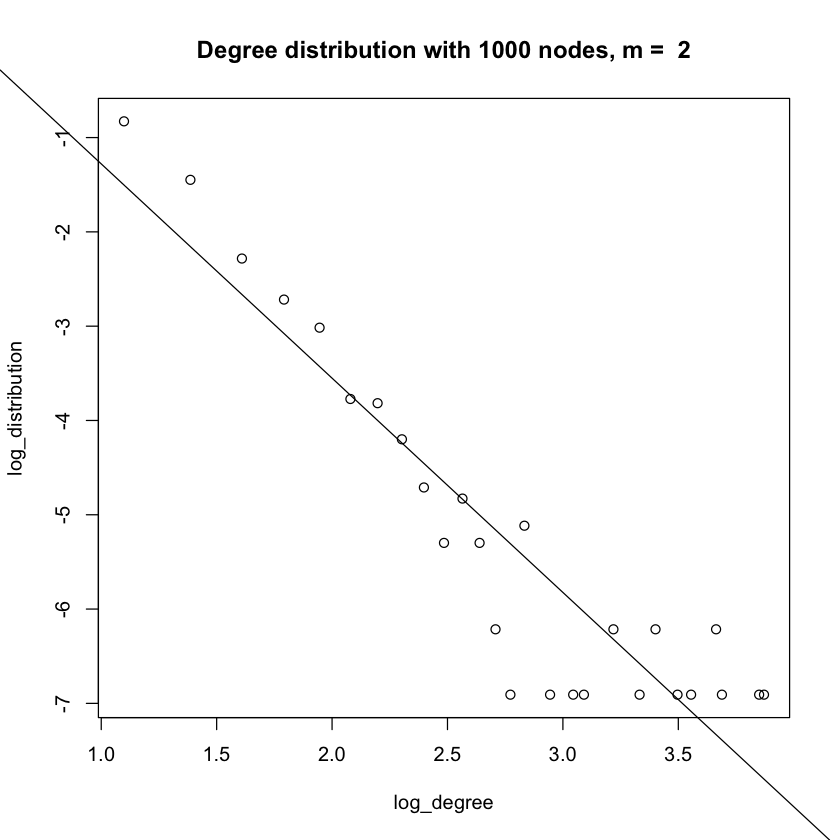

IGRAPH clustering fast greedy, groups: 35, mod: 0.53
+ groups:
  $`1`
    [1]   45  175  355  560  603  850  874  909  928  945  949 1071 1127 1143
   [15] 1169 1255 1260 1292 1295 1317 1323 1479 1538 1560 1681 1716 1755 1772
   [29] 1803 1838 1854 1896 1905 2009 2025 2129 2206 2218 2248 2314 2318 2387
   [43] 2408 2603 2625 2651 2682 2710 2946 2986 3161 3194 3236 3243 3283 3328
   [57] 3343 3368 3374 3377 3381 3393 3425 3581 3589 3623 3673 3708 3712 3732
   [71] 3762 3792 3823 3973 3980 3981 4032 4056 4059 4074 4098 4128 4191 4206
   [85] 4263 4273 4283 4297 4304 4317 4338 4340 4392 4533 4552 4572 4619 4655
   [99] 4666 4670 4683 4797 4845 5000 5045 5071 5104 5147 5154 5158 5167 5208
  [113] 5279 5423 5441 5482 5523 5528 5605 5615 5625 5668 5720 5836 5868 5884
  + ... omitted several groups/vertices


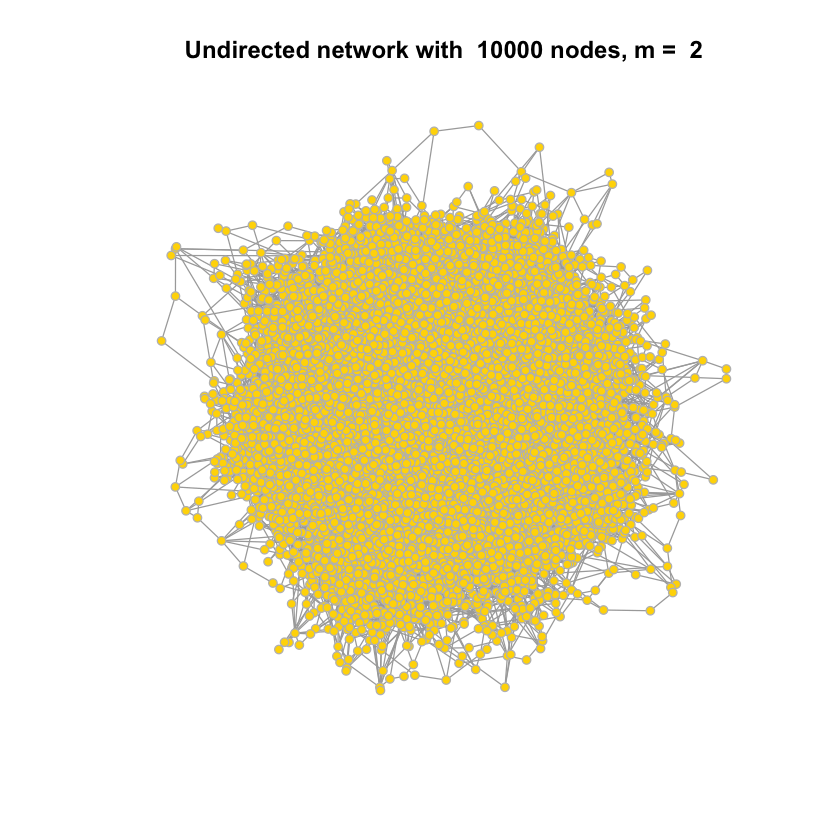

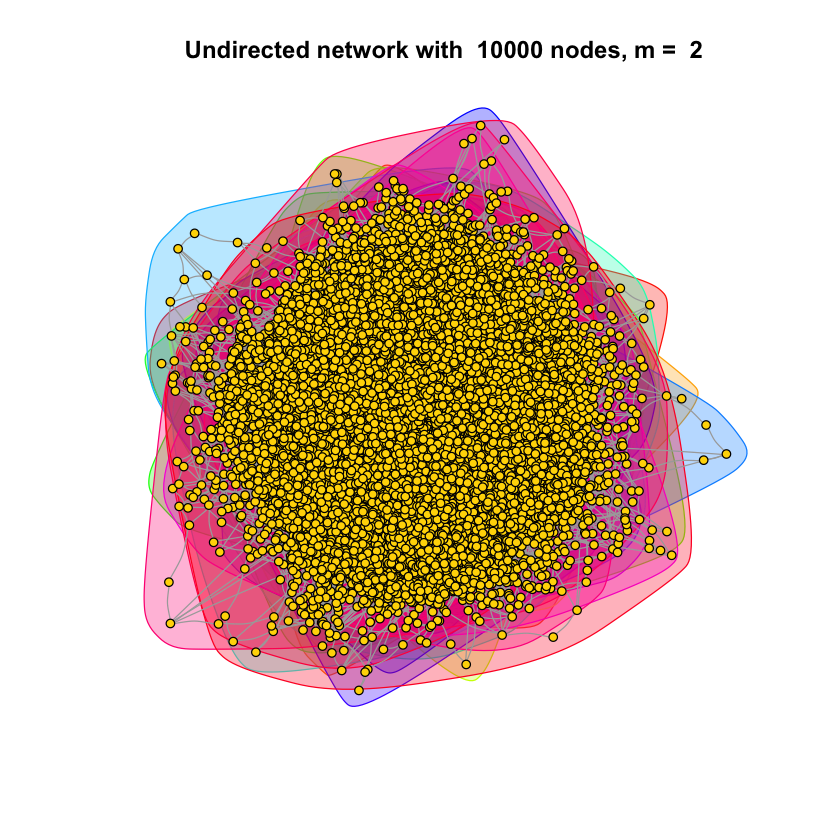

[1] "Slope of the plot is  -2.53055698422665"


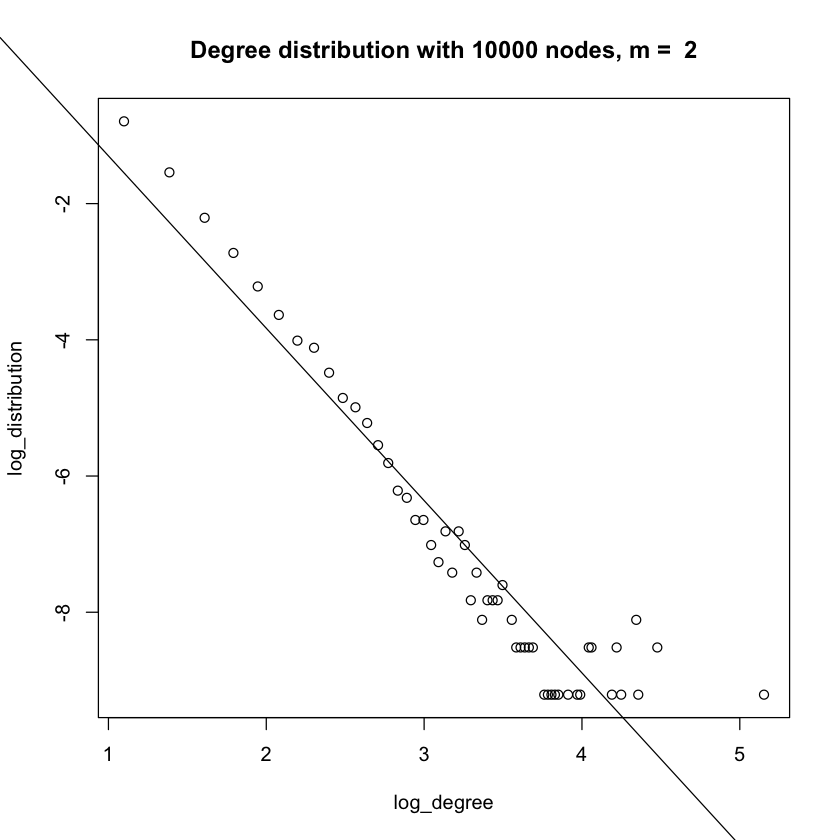

IGRAPH clustering fast greedy, groups: 11, mod: 0.28
+ groups:
  $`1`
    [1]   2   3   9  12  16  29  35  45  48  51  55  57  66  71  73  77  85  90
   [19]  91  92  93  95  96 104 112 118 122 138 141 143 146 151 153 170 174 177
   [37] 180 187 190 202 203 227 238 243 246 252 255 266 268 269 278 282 301 321
   [55] 334 336 337 338 340 345 347 349 363 368 374 376 378 383 385 400 401 402
   [73] 404 414 415 427 431 434 435 442 443 459 461 468 481 486 487 502 511 518
   [91] 524 531 535 543 544 548 553 556 559 561 565 572 579 587 589 590 592 599
  [109] 605 611 614 619 621 624 626 627 631 639 640 641 645 650 651 653 657 662
  [127] 667 670 671 678 679 688 690 697 705 706 710 711 715 721 723 724 730 735
  [145] 740 741 742 744 757 760 764 765 780 789 797 802 812 819 820 826 828 832
  + ... omitted several groups/vertices


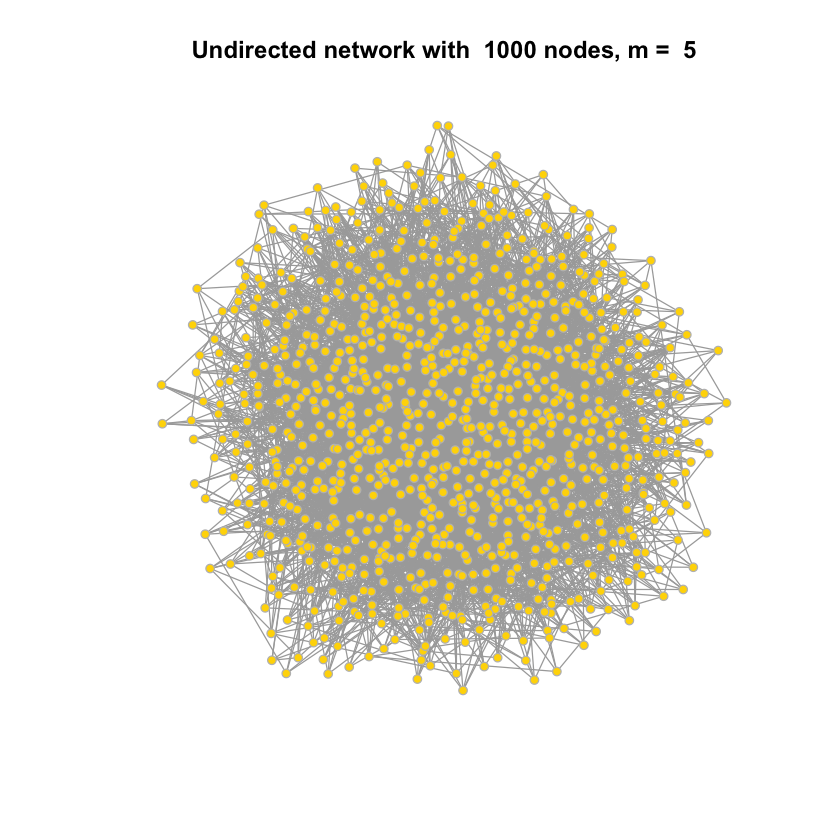

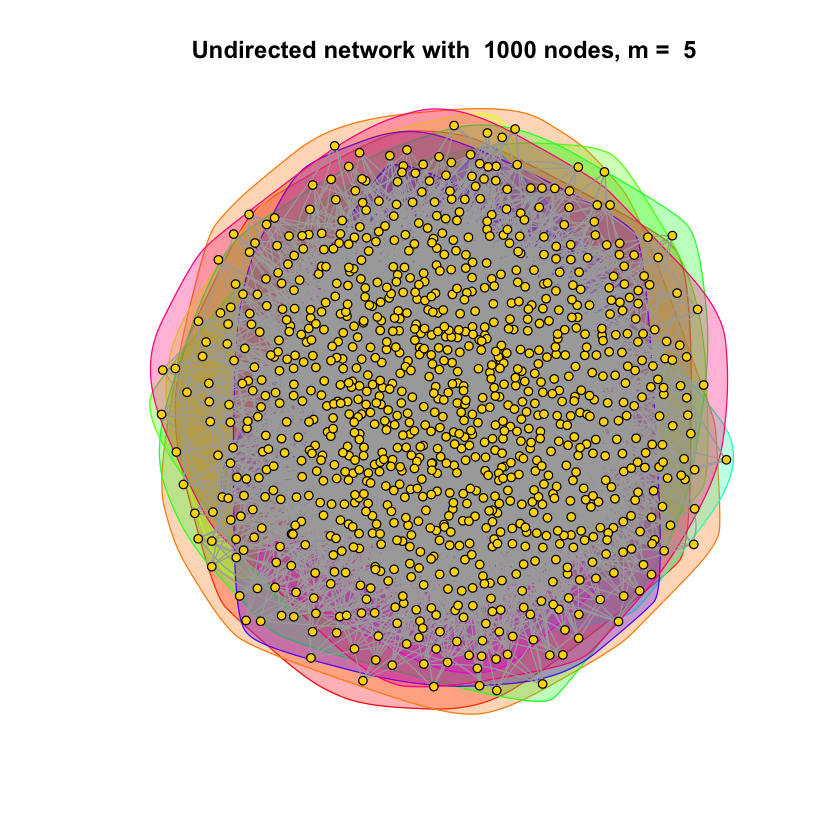

[1] "Slope of the plot is  -2.04019638262964"


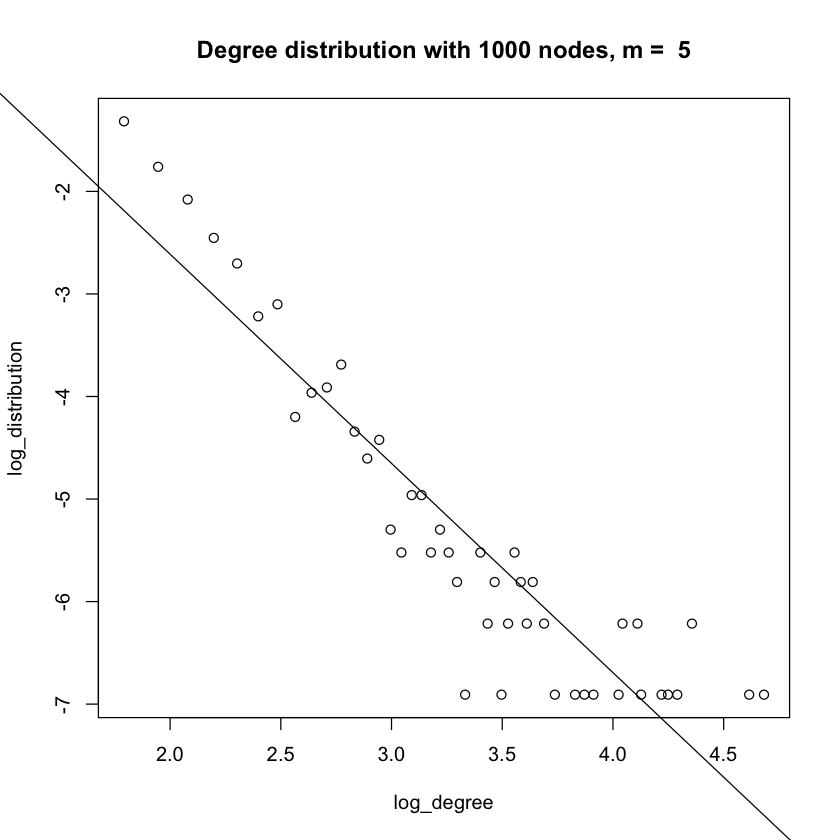

IGRAPH clustering fast greedy, groups: 14, mod: 0.28
+ groups:
  $`1`
     [1]    8   12   14   15   19   20   23   33   41   47   49   55   61   65
    [15]   66   74   75  106  119  121  126  132  139  140  142  144  158  160
    [29]  162  171  175  176  178  182  186  199  207  209  210  218  225  232
    [43]  238  247  255  264  266  271  279  287  294  295  297  300  301  308
    [57]  309  315  316  320  323  328  330  339  341  342  346  350  359  362
    [71]  367  376  388  390  394  399  400  402  406  409  410  423  425  426
    [85]  431  437  440  452  456  461  472  474  476  490  493  506  507  509
    [99]  518  525  526  527  536  539  540  544  547  555  560  563  564  565
   [113]  567  568  569  571  572  576  585  587  590  596  598  602  604  616
  + ... omitted several groups/vertices


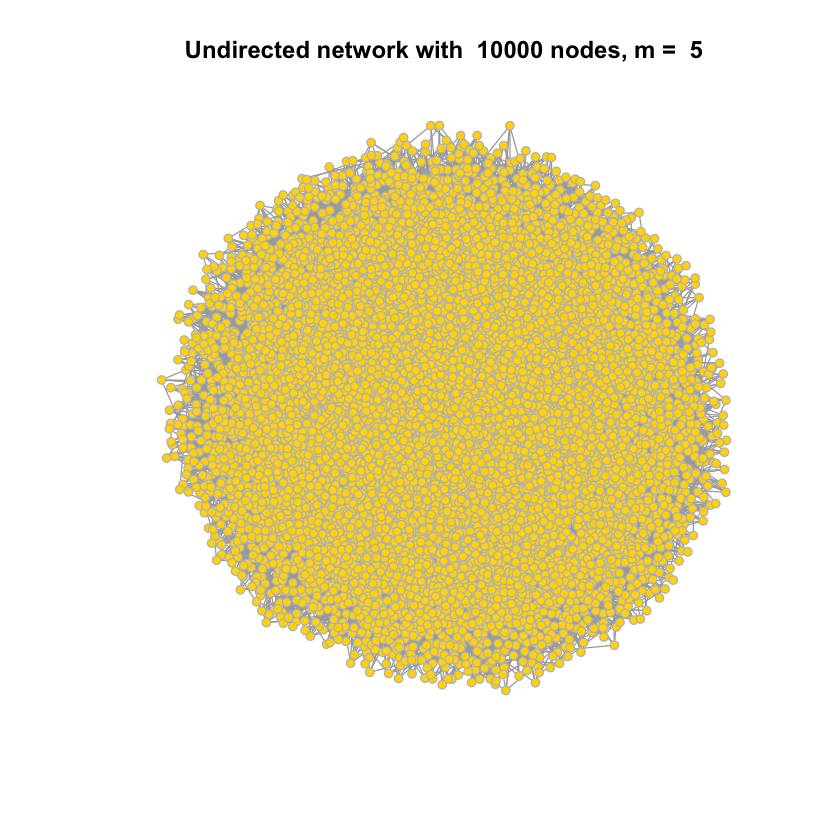

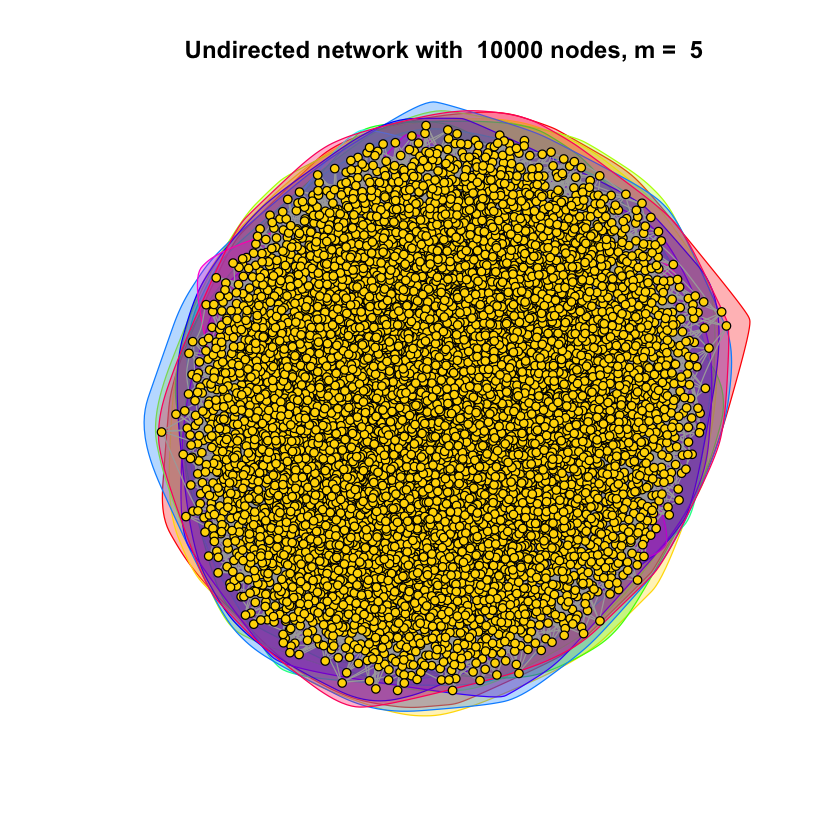

[1] "Slope of the plot is  -2.26446042166202"


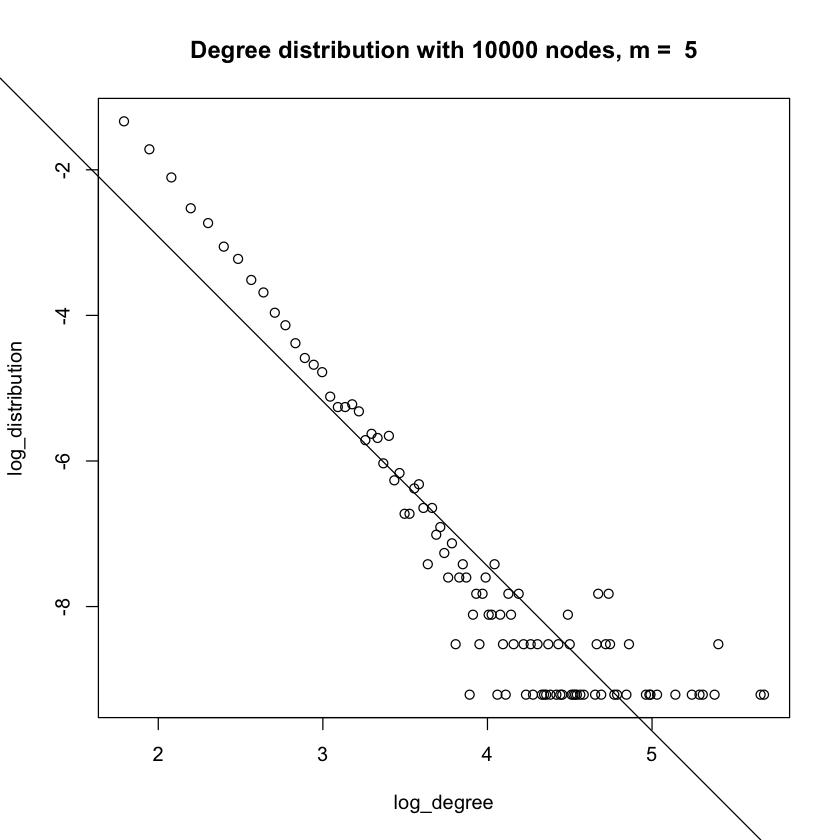

In [9]:
# g
m_node <- c(2, 5)
n_node <- c(1000, 10000)

degree_distribution = function(graph, n, m) {
    log_degree = log(seq(1:length(degree.distribution(graph))))
    log_distribution = log(degree.distribution(graph))
        
    index = which(!is.infinite(log_distribution), arr.ind=TRUE)
    log_degree = log_degree[index]
    log_distribution = log_distribution[index]
   
    plot(main = paste("Degree distribution with", n, "nodes, m = ", m), log_degree, log_distribution, 
         abline(lm(log_distribution ~ log_degree)))
    print(paste("Slope of the plot is ", cov(log_degree, log_distribution) / var(log_degree)))
}

for (i in m_node) {
    for (j in n_node) {
        g_g <- barabasi.game(j, m = i, directed = F)
    
        plot(main = paste("Undirected network with ", j, "nodes, m = ", i), g_g, vertex.color = "gold", 
             vertex.size = 3, vertex.frame.color = "gray", vertex.label = "")

        community <- cluster_fast_greedy(g_g)
        modularity(community)
        print(community)
        plot(main = paste("Undirected network with ", j, "nodes, m = ", i), g_g, mark.groups = groups(community), 
             vertex.color = "gold",vertex.size = 3, vertex.label.cex = 0.6, edge.curved = 0.2, vertex.label = "")

        index <- c(1:length(community))
        size <- as.vector(sizes(community))

        ggplot(data.frame(index, size), aes(index, size))+ 
        geom_bar(stat = "identity", fill = "blue")+
        labs(title = "Community Structure", x = "Community Index", y = "Community Size")+
        theme(plot.title = element_text(hjust = 0.5))
        
        degree_distribution(g_g, j, i)
    } 
}


IGRAPH clustering fast greedy, groups: 31, mod: 0.93
+ groups:
  $`1`
   [1]  39  64  70  71  96 110 122 150 151 160 178 188 204 291 326 340 398 561
  [19] 563 593 600 613 617 618 629 638 649 653 670 708 764 767 803 818 836 850
  [37] 856 864 880 888 933 948 968 972 994
  
  $`2`
   [1]  59  67 121 141 144 158 164 203 259 261 323 327 343 358 388 481 486 553
  [19] 555 575 603 607 620 640 652 697 712 718 738 762 802 810 813 828 851 853
  [37] 869 898 906 929 951 954 990 995
  
  + ... omitted several groups/vertices


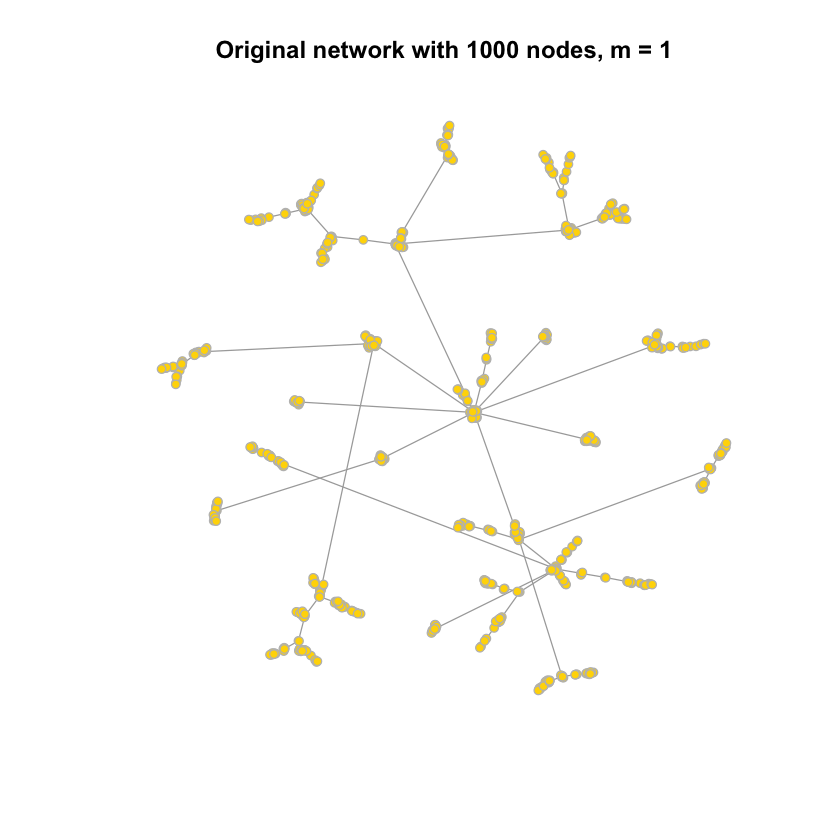

[1] "Modularity of original network with 1000 nodes, m = 1 is  0.933573212852495"


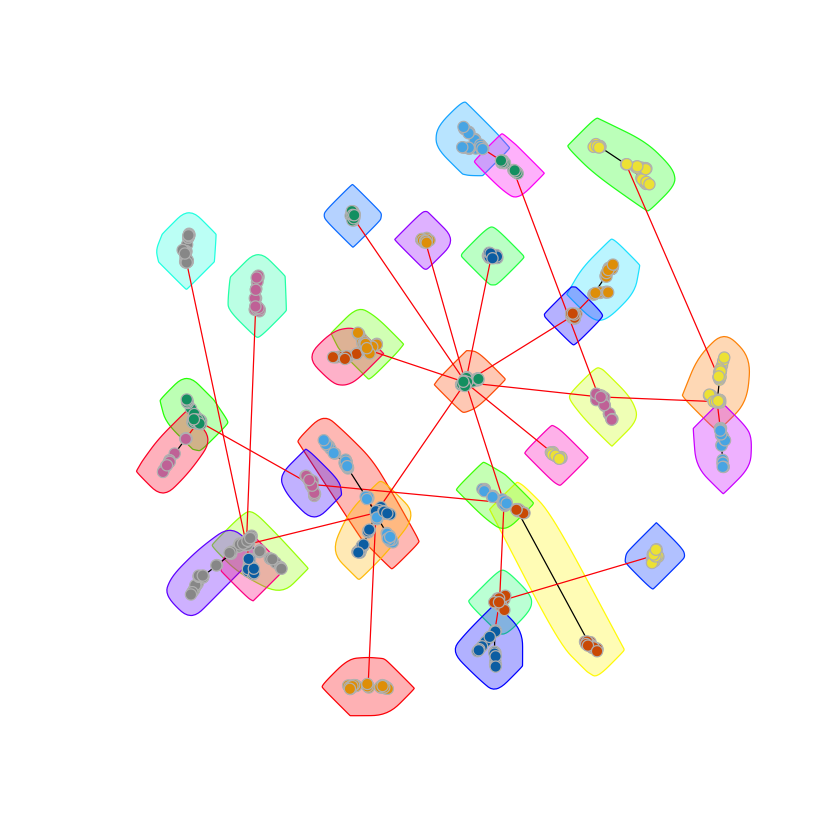

IGRAPH clustering fast greedy, groups: 142, mod: 0.84
+ groups:
  $`1`
   [1]  39  64  80  82  96  97 109 123 137 144 241 278 289 300 329 337 345 371
  [19] 411 433 435 437 438 449 473 512 515 535 550 631 653 704 706 719 786 845
  [37] 858 864 869 990
  
  $`2`
   [1]   2  18  29  33  38  71  72 110 111 115 117 198 209 216 219 235 237 276
  [19] 277 306 366 373 375 400 406 441 453 461 466 524 527 528 531 545 554 555
  [37] 565 572 584 595 598 617 650 696 703 705 731 855 927 941 955 966 998
  
  + ... omitted several groups/vertices


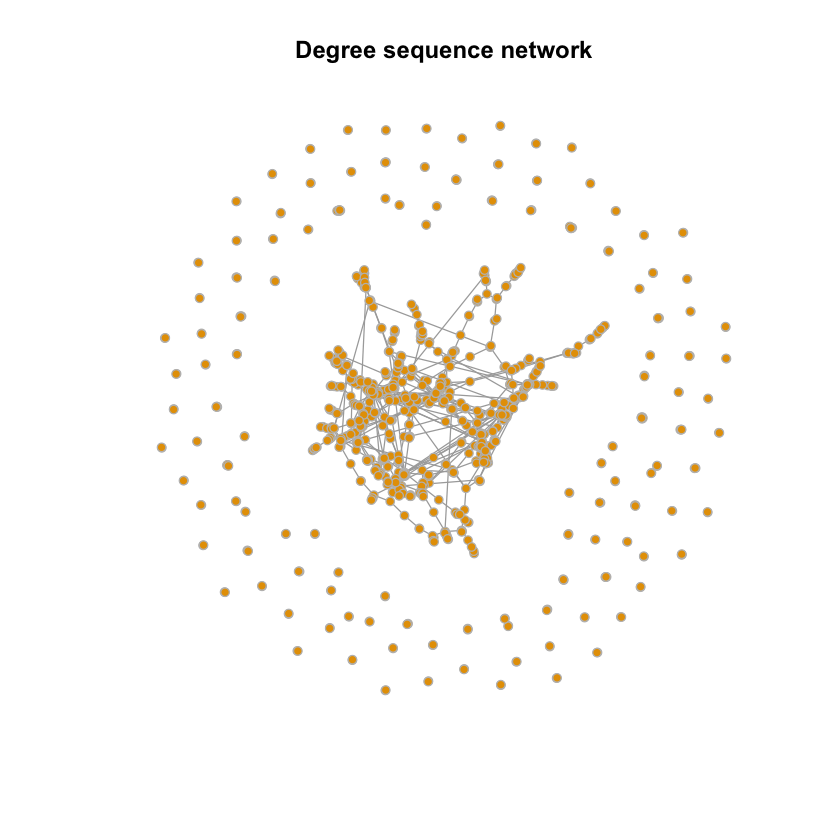

[1] "Modularity of new network with 1000 nodes, m = 1 is  0.840561783004227"


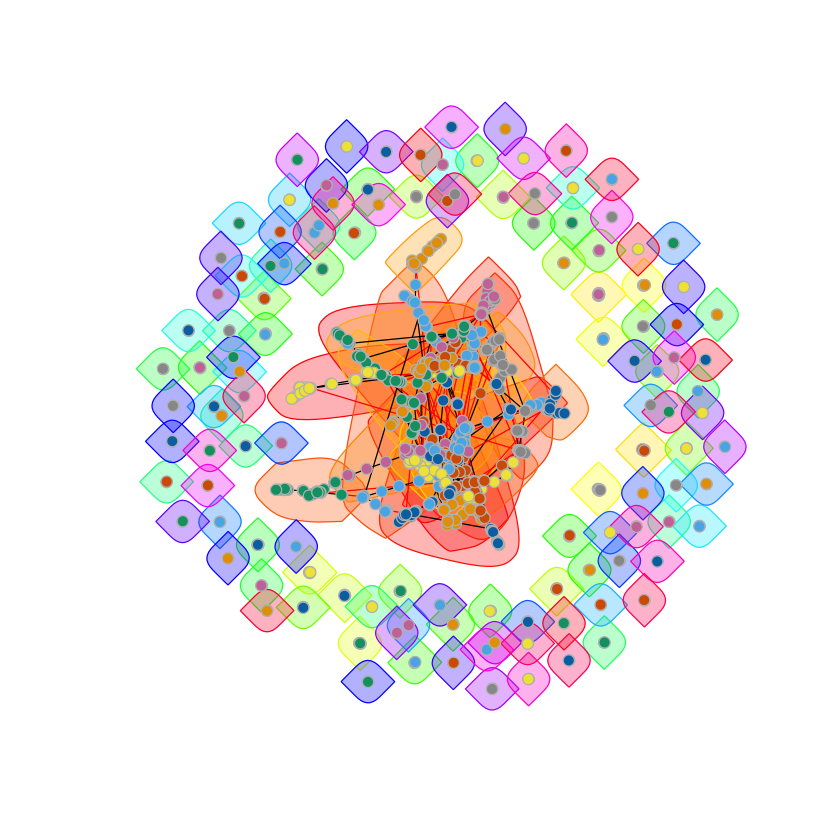

In [10]:
# h
g_h_1 <- barabasi.game(1000, m = 1, directed = F)
plot(main = "Original network with 1000 nodes, m = 1", g_h_1, vertex.color = "gold", vertex.size = 3, 
     vertex.frame.color = "gray", vertex.label = "")
degree_seq = degree(g_h_1)

# Original network
community_h_1 <- cluster_fast_greedy(g_h_1)
print(community_h_1)
plot(community_h_1, g_h_1, vertex.color = "gold", vertex.size = 4, vertex.frame.color = "gray", vertex.label = "")
print(paste("Modularity of original network with 1000 nodes, m = 1 is ", modularity(community_h_1)))

# Degree sequence network
g_h_2 <- sample_degseq(degree_seq, method = 'simple.no.multiple')
plot(main = "Degree sequence network", g_h_2, vertex.frame.color = "gray", vertex.size = 3, vertex.label = "")
community_h_2 <- cluster_fast_greedy(g_h_2)
print(community_h_2)
plot(community_h_2, g_h_2, vertex.color = "gold", vertex.size = 4, vertex.frame.color = "gray", vertex.label = "")
print(paste("Modularity of new network with 1000 nodes, m = 1 is ", modularity(community_h_2)))